# Retrieve research results (validation)

To inspect the reported research results you must install the following julia packages:
**JLD**, **PGFPlotsX**, **Plots**, **LaTeXStrings**, **CSV**, **DataFrames**

Notational conventions: prefixes **m** and **v** denote mean and variance of the random variables respectively.

For a sake of brevity, throughout the code we use $x$ and $z$ instead of $x^{(1)}$ and $x^{(2)}$ respectively.

In [2]:
using JLD, Plots, PGFPlotsX, SparseArrays, CSV, DataFrames, LaTeXStrings
pgfplotsx()
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\usepgfplotslibrary{fillbetween}")

# df = CSV.File("data/AAPL.csv") |> DataFrame
df = CSV.File("data/capr_prl_one_subject.csv") |> DataFrame
capr_one_subject = df[!, :reward_tally];

┌ Warning: backend `PGFPlotsX` is not installed.
└ @ Plots C:\Users\mkpap\.julia\packages\Plots\sxUvK\src\backends.jl:43


In [3]:
shgf3l_results = JLD.load("dump/results_3shgf_stocks_mixture.jld")
shgf2l_results = JLD.load("dump/results_2shgf_stocks_mixture.jld")
shgf2l3c_results = JLD.load("dump/results_2l3cshgf_stocks_mixture.jld")
hgf2l_results  = JLD.load("dump/results_hgf_stocks_mixture.jld");

In [ ]:
fe_shgf3l = shgf3l_results["results"]["fe"][2:end]
fe_shgf2l = shgf2l_results["results"]["fe"][2:end]
fe_shgf2l3c = shgf2l3c_results["results"]["fe"][2:end]
fe_hgf2l  = hgf2l_results["results"]["fe"][2:end]

fe_max_iter = 40
free_energy_axis = @pgf Axis({xlabel="iteration",
           ylabel="free-enery [nats]",
           legend_pos = "north east",
           grid = "major",
           mark_options = {scale=0.3}, xmin=-5.0, xmax=45,
    },
    Plot({mark = "square*", "blue"},Coordinates(collect(1:fe_max_iter),fe_shgf3l[1:fe_max_iter])),
    LegendEntry("3L-SHGF-2"),
    Plot({mark = "triangle*", "red"},Coordinates(collect(1:fe_max_iter),fe_shgf2l[1:fe_max_iter])),
    LegendEntry("2L-SHGF-2"),
    Plot({mark = "square", "green"},Coordinates(collect(1:fe_max_iter),fe_shgf2l3c[1:fe_max_iter])),
    LegendEntry("2L-SHGF-3"),
    Plot({mark = "o", "black"},Coordinates(collect(1:fe_max_iter),fe_hgf2l[1:fe_max_iter])),
    LegendEntry("2L-HGF"),
)
pgfsave("figures/validation_results_free_energy.tikz", free_energy_axis)

In [ ]:
mz_shgf3l = shgf3l_results["results"]["mz1"]
mz_shgf2l = shgf2l_results["results"]["mz"]
mz_shgf2l3c = shgf2l3c_results["results"]["mz"]
mz_hgf2l  = hgf2l_results["results"]["mz"]
vz_shgf3l = shgf3l_results["results"]["vz1"]
vz_shgf2l = shgf2l_results["results"]["vz"]
vz_shgf2l3c = shgf2l3c_results["results"]["vz"]
vz_hgf2l  = hgf2l_results["results"]["vz"]
n_samples = length(AAPL_stocks)
axis3 = @pgf Axis({xlabel=L"t",
           ylabel=L"x_t^{(2)}",
        legend_pos = "north west",
        mark_options = {scale=0.3},
        grid="major",
        style = {thick}
    },
    
    Plot({no_marks,color="blue"},Coordinates(collect(1:n_samples), mz_shgf3l)),
    LegendEntry("3L-SHGF-2"),
    Plot({no_marks,color="red"}, Coordinates(collect(1:n_samples), mz_shgf2l)),
    LegendEntry("2L-SHGF-2"),
    Plot({no_marks,color="green"},Coordinates(collect(1:n_samples), mz_shgf2l3c)),
    LegendEntry("2L-SHGF-3"),
    Plot({no_marks,color="black"},Coordinates(collect(1:n_samples), mz_hgf2l)),
    LegendEntry("2L-HGF"),
    
    Plot({ "name path=f1", no_marks,color="blue",opacity=0.2 }, Coordinates(collect(1:n_samples), mz_shgf3l .+  sqrt.(vz_shgf3l))),
    Plot({ "name path=g1", no_marks, color="blue",opacity=0.2}, Coordinates(collect(1:n_samples), mz_shgf3l .-  sqrt.(vz_shgf3l))),
    Plot({ thick, color = "blue", fill = "blue", opacity = 0.2 },
              raw"fill between [of=f1 and g1]"),
    
    Plot({ "name path=f2", no_marks,color="red",opacity=0.2 }, Coordinates(collect(1:n_samples), mz_shgf2l .+  sqrt.(vz_shgf2l))),
    Plot({ "name path=g2", no_marks, color="red",opacity=0.2}, Coordinates(collect(1:n_samples), mz_shgf2l .-  sqrt.(vz_shgf2l))),
    Plot({ thick, color = "blue", fill = "red", opacity = 0.2 },
               raw"fill between [of=f2 and g2]"),
    
    
    Plot({ "name path=f3", no_marks,color="green",opacity=0.2 }, Coordinates(collect(1:n_samples), mz_shgf2l3c .+  sqrt.(vz_shgf2l3c))),
    Plot({ "name path=g3", no_marks, color="green",opacity=0.2}, Coordinates(collect(1:n_samples), mz_shgf2l3c .-  sqrt.(vz_shgf2l3c))),
    Plot({ thick, color = "green", fill = "green", opacity = 0.2 },
               raw"fill between [of=f3 and g3]"),
    
   
    Plot({ "name path=f4", no_marks,color="black",opacity=0.2 }, Coordinates(collect(1:n_samples), mz_hgf2l .+  sqrt.(vz_hgf2l))),
    Plot({ "name path=g4", no_marks, color="black",opacity=0.2}, Coordinates(collect(1:n_samples), mz_hgf2l .-  sqrt.(vz_hgf2l))),
    Plot({ thick, color = "blue", fill = "black", opacity = 0.2 },
            raw"fill between [of=f4 and g4]"),
)

pgfsave("figures/validation_results_vol.tikz", axis3)

In [ ]:
mx_shgf3l = ["mx1"]
mx_shgf2l = shgf2l_results["results"]["mx"]
mx_hgf2l  = hgf2l_results["results"]["mx"]
vx_shgf3l = shgf3l_results["results"]["vx"]
vx_shgf2l = shgf2l_results["results"]["vx"]
vx_hgf2l  = hgf2l_results["results"]["vx"];

In [ ]:
ms = shgf2l_results["results"]["ms"]
categories = [x[2] for x in findmax.(ms)]
maxup = maximum(AAPL_stocks) + 3.0
mindown = minimum(AAPL_stocks) - 3.0
axis4 = @pgf Axis({xlabel=L"t",
           ylabel=L"x_t^{(1)}",
        legend_pos = "north west",
        mark_options = {scale=0.3},
        grid="major",
        style = {thick}
    },
    Plot({no_marks,color="magenta"},Coordinates(collect(1:n_samples), mx_shgf2l)),
    LegendEntry("2L-SHGF"),
    Plot({ "name path=f", no_marks,color="magenta",opacity=0.2 }, Coordinates(collect(1:n_samples), mx_shgf2l .+  3*sqrt.(vx_shgf2l))),
    Plot({ "name path=g", no_marks, color="magenta",opacity=0.2}, Coordinates(collect(1:n_samples), mx_shgf2l .-  3*sqrt.(vx_shgf2l))),
    Plot({ thick, color = "magenta", fill = "magenta", opacity = 0.2 },
               raw"fill between [of=f and g]"),
    Plot({only_marks,color="black",opacity=0.3}, Coordinates(collect(1:n_samples),AAPL_stocks)),
    Plot(
       {only_marks, scatter, scatter_src = "explicit"},
       Table(
           {x = "x", y = "y", meta = "col"},
            x = collect(1:n_samples), y = mindown*ones(n_samples), col = categories
       ),
    ),
)

#pgfsave("figures/validation_prices2.tikz", axis4)

In [ ]:
mω = shgf3l_results["results"]["mω2"]

In [ ]:
# Please restart kernel to use this snippet
import Plots
using JLD

shgf3l_results = JLD.load("dump/results_3shgf_stocks_mixture.jld")
shgf2l_results = JLD.load("dump/results_2shgf_stocks_mixture.jld")
shgf2l3c_results = JLD.load("dump/results_2l3cshgf_stocks_mixture.jld")
hgf2l_results  = JLD.load("dump/results_hgf_stocks_mixture.jld");

fe_shgf3l = shgf3l_results["results"]["fe"][2:end]
fe_shgf2l = shgf2l_results["results"]["fe"][2:end]
fe_shgf2l3c = shgf2l3c_results["results"]["fe"][2:end]
fe_hgf2l  = hgf2l_results["results"]["fe"][2:end]

Plots.plot(fe_shgf3l, label="3L-SHGF")
Plots.plot!(fe_shgf2l, label="2L-SHGF")
Plots.plot!(fe_shgf2l3c, label="2L-SHGF, 3 cats")
Plots.plot!(fe_hgf2l, label="2L-HGF", background_color=:grey95, ylabel="Free energy [nats]", xlabel="iteration")
Plots.savefig("fe_comparison.png")

# Implemetation

To run the inference, the following packages must be installed:
**ForneyLab**, **ProgressMeter**, **CSV**, **DataFrames**

In [9]:
using ForneyLab
include("sgcv/SGCV.jl")
using Main.SGCV
include("gcv/GCV.jl")
using Main.GCV
using Plots
using SparseArrays
using ProgressMeter
include("compatibility.jl") # resolves compatibility issues with ForneyLab

prod! (generic function with 82 methods)

In [10]:
include("sgcv/SGCV.jl")
using Main.SGCV
include("gcv/GCV.jl")
using Main.GCV
using Plots
using SparseArrays
using ProgressMeter
include("compatibility.jl") # resolves compatibility issues with ForneyLab

prod! (generic function with 82 methods)

In [11]:
# Auxialry function for graph initializtion
pad(sym::Symbol, t::Int) = sym*:_*Symbol(lpad(t,3,'0')) # Left-pads a number with zeros, converts it to symbol and appends to sym

pad (generic function with 1 method)

In [12]:
using CSV, DataFrames
# df = CSV.File("data/AAPL.csv") |> DataFrame
df = CSV.File("data/capr_prl_one_subject.csv") |> DataFrame
# series = df[!, :Open];
series = df[!, :reward_tally];
# scatter(series, markershape=:xcross, markersize=1.5, markeralpha=0.5, background_color=:grey97, label="APPL")
scatter(series, markershape=:xcross, markersize=1.5, markeralpha=0.5, background_color=:grey97, label="capr_prl_one_subject")


In [14]:
shift = 0.5
@gif for i in 1:length(series)
    scatter(series[1:i], markershape=:xcross, markersize=1.5, markeralpha=0.5, xlim = (0, length(series)), ylim = (minimum(series)-shift, maximum(series)+shift), label="capr_prl_one_subject", xlabel=:trial, ylabel="reward_tally", background_color=:grey95)
end every 1

PGFPlotsX.MissingExternalProgramError: No LaTeX installation found, figures will not be generated. Make sure either pdflatex, xelatex or lualatex are installed and that the PATH variable is correctly set.

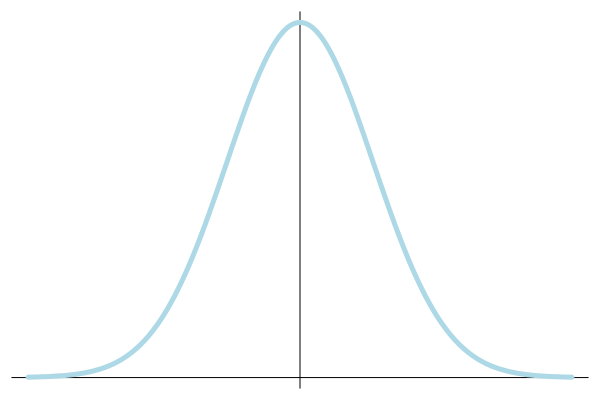

In [15]:
using StatsPlots
import Distributions
normal = Distributions.Normal(0.0, 1.0)
plot(normal, background_color=:transparent, foreground_color=:black, grid=false, ticks = false, legend=false, linewidth=5.0, color=:lightblue, framestyle = :origin)

### 2-L SHGF

In [24]:
# Function for generating 2-L SHGF and message-passing (MP) algorithm
function generate_mp_2l(ndim, n_samples)
    fg = FactorGraph()
    z = Vector{Variable}(undef, n_samples)
    x = Vector{Variable}(undef, n_samples)
    y = Vector{Variable}(undef, n_samples)
    s = Vector{Variable}(undef, n_samples)
    @RV A ~ Dirichlet(ones(ndim, ndim))
    @RV ω ~ GaussianMeanPrecision(placeholder(:mω, dims=(ndim, )), placeholder(:wω, dims=(ndim, ndim)))
    @RV [id=pad(:z,1)] z[1] ~ GaussianMeanPrecision(placeholder(:mz_prior1), placeholder(:wz_prior1))
    @RV [id=pad(:x,1)] x[1] ~ GaussianMeanPrecision(placeholder(:mx_prior1), placeholder(:wx_prior1))
    @RV [id=pad(:y,1)] y[1] ~ GaussianMeanPrecision(x[1], placeholder(:wy_prior1))
    @RV [id=pad(:s,1)] s[1] ~ ForneyLab.Categorical(ones(ndim) ./ ndim)
    placeholder(y[1], :y, index = 1)
    for t in 2:n_samples
        @RV [id=pad(:s,t)] s[t] ~ Transition(s[t-1], A)
        @RV [id=pad(:z,t)] z[t] ~ GaussianMeanPrecision(z[t - 1], placeholder(pad(:wz_transition, t)))
        @RV [id=pad(:x,t)] x[t] ~ SwitchingGaussianControlledVariance(x[t - 1], z[t],ones(ndim), ω,s[t])
        @RV [id=pad(:y,t)] y[t] ~ GaussianMeanPrecision(x[t], placeholder(pad(:wy_transition, t)))
        placeholder(y[t], :y, index = t)
    end
    q = PosteriorFactorization(x, z, ω, s, A, ids=[:X :Z :Ω :S :A])
    algo = messagePassingAlgorithm(free_energy=true)
    src_code = algorithmSourceCode(algo, free_energy=true);
    return src_code
end


generate_mp_2l (generic function with 1 method)

In [25]:

# Function for running MP-based inference for 2-L SHGF
function mp_2l(obs;
    ndims,
    n_its = 100,
    wy_prior1 = 1.0,
    κ_m_prior = ones(ndims),
    ω_m_prior = omegas,
    κ_w_prior =  huge .* diageye(ndims),
    ω_w_prior = 1.0 * diageye(ndims),
    z_m_prior = 0.0,
    z_w_prior = 1.0,
    x_m_prior = 0.0,
    x_w_prior = 1.0,
    x_x_m_prior = zeros(ndims),
    x_x_w_prior = 1.0*diageye(ndims),
    z_z_m_prior = zeros(ndims),
    z_z_w_prior = 1.0*diageye(ndims),
    z_w_transition_prior = 100.0,
    y_w_transition_prior =  1/mnv,
)
    n_samples = length(obs)
    marginals = Dict()
    marginals[:A] = ProbabilityDistribution(ForneyLab.MatrixVariate, Dirichlet, a=ones(ndims, ndims))
    marginals[:κ] = ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanPrecision, m = κ_m_prior, w = κ_w_prior)
    marginals[:ω] = ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanPrecision, m = ω_m_prior, w = ω_w_prior)
    marginals[pad(:z,1)] = vague(GaussianMeanPrecision)
    marginals[pad(:x,1)] = vague(GaussianMeanPrecision)
    marginals[pad(:s,1)] = vague(Categorical, ndims)
    for t = 2:n_samples
        marginals[pad(:z,t)] = ProbabilityDistribution(ForneyLab.Univariate, GaussianMeanPrecision, m = z_m_prior, w = z_w_prior)
        marginals[pad(:x,t)] = ProbabilityDistribution(ForneyLab.Univariate, GaussianMeanPrecision, m = x_m_prior, w = x_w_prior)
        marginals[pad(:s,t)] = ProbabilityDistribution(Categorical, p = ones(ndims) ./ ndims)
        marginals[pad(:s,t)*:_*pad(:s,t-1)] = ProbabilityDistribution(Contingency,p=ones(ndims, ndims) ./ ndims)
        marginals[pad(:z,t)*:_*pad(:z,t-1)] = ProbabilityDistribution(ForneyLab.Multivariate,GaussianMeanPrecision, m = z_z_m_prior, w = z_z_w_prior)
        marginals[pad(:x,t)*:_*pad(:x,t-1)] = ProbabilityDistribution(ForneyLab.Multivariate,GaussianMeanPrecision, m = x_x_m_prior, w = x_x_w_prior)
    end
    data = Dict()
    data[:y] = obs
    data[:mz_prior1] = z_m_prior
    data[:wz_prior1] = z_w_prior
    data[:mx_prior1] = x_m_prior
    data[:wx_prior1] = x_w_prior
    data[:wy_prior1] = wy_prior1
    data[:mω] = ω_m_prior
    data[:wω] = ω_w_prior
    for t = 1:n_samples
        data[pad(:wz_transition, t)] = z_w_transition_prior
        data[pad(:wy_transition, t)] = y_w_transition_prior
    end


    fe = Vector{Float64}(undef, n_its)

    @showprogress "Iterations" for i = 1:n_its

        stepX!(data, marginals)
        stepS!(data, marginals)
        stepA!(data, marginals)
        stepΩ!(data, marginals)
        stepZ!(data, marginals)

        fe[i] = freeEnergy(data, marginals)
    end

    mz = [ForneyLab.unsafeMean(marginals[pad(:z,t)]) for t=1:n_samples]
    vz = [ForneyLab.unsafeVar(marginals[pad(:z,t)]) for t=1:n_samples]
    mω = ForneyLab.unsafeMean(marginals[:ω])
    vω = ForneyLab.unsafeCov(marginals[:ω])
    mx = [ForneyLab.unsafeMean(marginals[pad(:x,t)]) for t=1:n_samples]
    vx = [ForneyLab.unsafeVar(marginals[pad(:x,t)]) for t=1:n_samples]
    ms = [ForneyLab.unsafeMean(marginals[pad(:s,t)]) for t=1:n_samples]
    return mz,vz,mω, vω, mx,vx,ms,fe
end

mp_2l (generic function with 1 method)

In [18]:
# Empirically selected prior
omegas = [-8.0, 10.0]

2-element Vector{Float64}:
 -8.0
 10.0

In [26]:
n_cats = length(omegas)
code = generate_mp_2l(n_cats, length(series))
eval(Meta.parse(code))

LoadError: No applicable StructuredVariationalRule{SwitchingGaussianControlledVariance} for interface :z of switchinggaussiancontrolledvariance_1 with inbound types:
[Distribution, Nothing, Distribution, Distribution, Distribution]

In [52]:
mz,vz,mω, vω, mx,vx,ms,fe = mp_2l(series, x_m_prior=series[1], ndims=n_cats, z_w_prior=100.0, z_z_w_prior=100.0*diageye(2), z_w_transition_prior=100.0, ω_m_prior=omegas, ω_w_prior=diageye(2), y_w_transition_prior=1e6)

results =   Dict("mz" => mz, "vz" => vz,
                  "mx" => mx, "vx" => vx,
                  "ms" => ms, "fe" => fe,
                  "mω" => mω, "vω" => vω,
                  "ωprior" => omegas);

UndefVarError: UndefVarError: `stepX!` not defined

In [8]:
mω

UndefVarError: UndefVarError: `mω` not defined

In [9]:
xlims_ = 1, 350
switch_line = 52
shift = 0.05
scatter(series, background_color=:grey95, xlabel=:Day, ylabel="Price \$", label=:APPL, markershape=:xcross, markersize=2, markeralpha=1.0, color=:black)
plot!(mx, ribbon=sqrt.(vx), label=false)
scatter!(switch_line*ones(length(ms)), color=argmax.(ms), markersize=5.0, markeralpha=0.5, label=false)
xlims!(xlims_)
ylims!(mx[xlims_[1]]-shift, mx[xlims_[2]]+shift)

UndefVarError: UndefVarError: `scatter` not defined

In [10]:
shift = 1.0
plot(mz, ribbon=sqrt.(vz), label=false, xlim = (0, length(series)), ylim = (minimum(mz)-shift, maximum(mz)+shift) ,background_color=:grey95, xlabel=:Day)
xlims!(xlims_)
ylims!(mz[xlims_[1]]-shift, mz[xlims_[2]]+shift)

UndefVarError: UndefVarError: `series` not defined

In [11]:
scatter(argmax.(ms), color=argmax.(ms), markersize=3.0, markeralpha=0.5)

UndefVarError: UndefVarError: `ms` not defined

In [12]:
shift = 10
@gif for i in 1:length(series)
    scatter(series[1:i], markershape=:xcross, markersize=1.5, markeralpha=0.5, xlim = (0, length(series)), ylim = (minimum(series)-shift, maximum(series)+shift), label=:APPL, xlabel=:Day, ylabel="Price \$", background_color=:grey95)
    scatter!(50*ones(length(ms[1:i])), color=argmax.(ms[1:i]), markersize=5.0, markeralpha=0.5, label=false)    
    plot!(mx[1:i], ribbon=sqrt.(vx[1:i]), label=false)
end every 1

LoadError: LoadError: UndefVarError: `@gif` not defined
in expression starting at c:\xampp\htdocs\SGCV\validation_capr.ipynb:2

In [13]:
shift = 1
@gif for i in 1:length(series)
    plot(mz[1:i], ribbon=sqrt.(vz[1:i]), label=false, xlim = (0, length(series)), ylim = (minimum(mz)-shift, maximum(mz)+shift) ,background_color=:grey95, xlabel=:Day)
end every 1

LoadError: LoadError: UndefVarError: `@gif` not defined
in expression starting at c:\xampp\htdocs\SGCV\validation_capr.ipynb:2

In [14]:
using JLD
JLD.save("dump/results_2shgf_stocks_mixture.jld","results",results)

UndefVarError: UndefVarError: `results` not defined

### 3-L SHGF

In [15]:
# Function for generating 3-L SHGF and message-passing (MP) algorithm
function generate_mp_3l(n_cats1, n_cats2, n_samples)
    fg = FactorGraph()
    z2 = Vector{Variable}(undef, n_samples)
    s2 = Vector{Variable}(undef, n_samples)
    z1 = Vector{Variable}(undef, n_samples)
    s1 = Vector{Variable}(undef, n_samples)
    x = Vector{Variable}(undef, n_samples)
    y = Vector{Variable}(undef, n_samples)
    @RV A2 ~ Dirichlet(ones(n_cats2, n_cats2))
    @RV A1 ~ Dirichlet(ones(n_cats1, n_cats1))
    @RV ω2 ~ GaussianMeanPrecision(placeholder(:mω2, dims=(n_cats2, )), placeholder(:wω2, dims=(n_cats2, n_cats2)))
    @RV ω1 ~ GaussianMeanPrecision(placeholder(:mω1, dims=(n_cats1, )), placeholder(:wω1, dims=(n_cats1, n_cats1)))
    @RV [id=pad(:z1,1)] z1[1] ~ GaussianMeanPrecision(placeholder(:mz1_prior1), placeholder(:wz1_prior1))
    @RV [id=pad(:z2,1)] z2[1] ~ GaussianMeanPrecision(placeholder(:mz2_prior1), placeholder(:wz2_prior1))
    @RV [id=pad(:x,1)] x[1] ~ GaussianMeanPrecision(placeholder(:mx_prior1), placeholder(:wx_prior1))
    @RV [id=pad(:y,1)] y[1] ~ GaussianMeanPrecision(x[1], placeholder(:wy_prior1))
    @RV [id=pad(:s1,1)] s1[1] ~ ForneyLab.Categorical(ones(n_cats1) ./ n_cats1)
    @RV [id=pad(:s2,1)] s2[1] ~ ForneyLab.Categorical(ones(n_cats2) ./ n_cats2)
    placeholder(y[1], :y, index = 1)
    for t in 2:n_samples
        @RV [id=pad(:s2, t)] s2[t] ~ Transition(s2[t-1], A2)
        @RV [id=pad(:s1, t)] s1[t] ~ Transition(s1[t-1], A1)
        @RV [id=pad(:z2,t)] z2[t] ~ GaussianMeanPrecision(z2[t - 1], placeholder(pad(:wz2_transition, t)))
        @RV [id=pad(:z1,t)] z1[t] ~ SwitchingGaussianControlledVariance(z1[t - 1], z2[t], ones(n_cats2), ω2,s2[t])
        @RV [id=pad(:x,t)] x[t] ~ SwitchingGaussianControlledVariance(x[t - 1], z1[t], ones(n_cats1), ω1,s1[t])
        @RV [id=pad(:y,t)] y[t] ~ GaussianMeanPrecision(x[t], placeholder(pad(:wy_transition, t)))
        placeholder(y[t], :y, index = t)
    end
    q = PosteriorFactorization(x, z1, s1, z2, s2, A1, A2, ω1, ω2, ids=[:X :Z1 :S1 :Z2 :S2 :A1 :A2 :Ω1 :Ω2])
    algo = messagePassingAlgorithm(free_energy=true)
    src_code = algorithmSourceCode(algo, free_energy=true);
    return src_code
end

# Function for running MP-based inference for 3-L SHGF
function mp_3l(obs;
    n_cats1, n_cats2,
    n_its = 20,
    wy_prior1 = 1.0,
    κ1_m_prior = ones(n_cats1),
    ω1_m_prior = omegas1,
    κ1_w_prior =  huge .* diageye(n_cats1),
    ω1_w_prior = 1.0 * diageye(n_cats1),
    z1_m_prior = 0.0,
    z1_w_prior = 1.0,
    κ2_m_prior = ones(n_cats2),
    ω2_m_prior = omegas2,
    κ2_w_prior =  huge .* diageye(n_cats2),
    ω2_w_prior = 1.0 * diageye(n_cats2),
    z2_m_prior = 0.0,
    z2_w_prior = 1.0,
    x_m_prior = 0.0,
    x_w_prior = 1.0,
    x_x_m_prior = zeros(n_cats1),
    x_x_w_prior = 1.0*diageye(n_cats1),
    z1_z1_m_prior = zeros(n_cats1),
    z1_z1_w_prior = 1.0*diageye(n_cats1),
    z1_w_transition_prior = 1000.0,
    z2_z2_m_prior = zeros(n_cats2),
    z2_z2_w_prior = 1.0*diageye(n_cats2),
    z2_w_transition_prior = 10.0,
    y_w_transition_prior =  1/mnv,
)
    n_samples = length(obs)
    marginals = Dict()

    # second  layer
    marginals[:A1] = ProbabilityDistribution(ForneyLab.MatrixVariate, Dirichlet, a=ones(n_cats1, n_cats1))
    marginals[:κ1] = ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanPrecision, m = κ1_m_prior, w = κ1_w_prior)
    marginals[:ω1] = ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanPrecision, m = ω1_m_prior, w = ω1_w_prior)
    marginals[pad(:z1,1)] = vague(GaussianMeanPrecision)

    # third layer
    marginals[:A2] = ProbabilityDistribution(ForneyLab.MatrixVariate, Dirichlet, a=ones(n_cats2, n_cats2))
    marginals[:κ2] = ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanPrecision, m = κ2_m_prior, w = κ2_w_prior)
    marginals[:ω2] = ProbabilityDistribution(ForneyLab.Multivariate, GaussianMeanPrecision, m = ω2_m_prior, w = ω2_w_prior)
    marginals[pad(:z2,1)] = vague(GaussianMeanPrecision)

    marginals[pad(:x,1)] = vague(GaussianMeanPrecision)
    marginals[pad(:s1,1)] = vague(Categorical, n_cats1)
    marginals[pad(:s2,1)] = vague(Categorical, n_cats2)
    for t = 2:n_samples
        marginals[pad(:z1,t)] = ProbabilityDistribution(ForneyLab.Univariate, GaussianMeanPrecision, m = z1_m_prior, w = z1_w_prior)
        marginals[pad(:z2,t)] = ProbabilityDistribution(ForneyLab.Univariate, GaussianMeanPrecision, m = z2_m_prior, w = z2_w_prior)
        marginals[pad(:x,t)] = ProbabilityDistribution(ForneyLab.Univariate, GaussianMeanPrecision, m = x_m_prior, w = x_w_prior)
        marginals[pad(:s1,t)] = ProbabilityDistribution(Categorical, p = ones(n_cats1) ./ n_cats1)
        marginals[pad(:s2,t)] = ProbabilityDistribution(Categorical, p = ones(n_cats2) ./ n_cats2)
        marginals[pad(:s1,t)*:_*pad(:s1,t-1)] = ProbabilityDistribution(Contingency,p=ones(n_cats1, n_cats1) ./ n_cats1)
        marginals[pad(:s2,t)*:_*pad(:s2,t-1)] = ProbabilityDistribution(Contingency,p=ones(n_cats2, n_cats2) ./ n_cats2)
        marginals[pad(:z1,t)*:_*pad(:z1,t-1)] = ProbabilityDistribution(ForneyLab.Multivariate,GaussianMeanPrecision, m = z1_z1_m_prior, w = z2_z2_m_prior)
        marginals[pad(:z2,t)*:_*pad(:z2,t-1)] = ProbabilityDistribution(ForneyLab.Multivariate,GaussianMeanPrecision, m = z2_z2_m_prior, w = z2_z2_w_prior)
        marginals[pad(:x,t)*:_*pad(:x,t-1)] = ProbabilityDistribution(ForneyLab.Multivariate,GaussianMeanPrecision, m = x_x_m_prior, w = x_x_w_prior)
    end
    data = Dict()
    data[:y] = obs
    data[:mz1_prior1] = z1_m_prior
    data[:wz1_prior1] = z1_w_prior
    data[:mz2_prior1] = z2_m_prior
    data[:wz2_prior1] = z2_w_prior
    data[:mx_prior1] = x_m_prior
    data[:wx_prior1] = x_w_prior
    data[:wy_prior1] = wy_prior1
    data[:mω1] = ω1_m_prior
    data[:mω2] = ω2_m_prior
    data[:wω1] = ω1_w_prior
    data[:wω2] = ω2_w_prior
    for t = 1:n_samples
        data[pad(:wz1_transition, t)] = z1_w_transition_prior
        data[pad(:wz2_transition, t)] = z2_w_transition_prior
        data[pad(:wy_transition, t)] = y_w_transition_prior
    end


    fe = Vector{Float64}(undef, n_its)

    @showprogress "Iterations" for i = 1:n_its

        stepX!(data, marginals)
        stepS1!(data, marginals)
        stepA1!(data, marginals)
        stepΩ1!(data, marginals)
        stepZ1!(data, marginals)
        stepS2!(data, marginals)
        stepA2!(data, marginals)
        stepΩ2!(data, marginals)
        stepZ2!(data, marginals)

        fe[i] = freeEnergy(data, marginals)
    end

    mz1 = [ForneyLab.unsafeMean(marginals[pad(:z1,t)]) for t=1:n_samples]
    vz1 = [ForneyLab.unsafeVar(marginals[pad(:z1,t)]) for t=1:n_samples]
    mω1 = ForneyLab.unsafeMean(marginals[:ω1])
    vω1 = ForneyLab.unsafeCov(marginals[:ω1])
    mz2 = [ForneyLab.unsafeMean(marginals[pad(:z2,t)]) for t=1:n_samples]
    vz2 = [ForneyLab.unsafeVar(marginals[pad(:z2,t)]) for t=1:n_samples]
    mω2 = ForneyLab.unsafeMean(marginals[:ω2])
    vω2 = ForneyLab.unsafeCov(marginals[:ω2])
    mx = [ForneyLab.unsafeMean(marginals[pad(:x,t)]) for t=1:n_samples]
    vx = [ForneyLab.unsafeVar(marginals[pad(:x,t)]) for t=1:n_samples]
    ms1 = [ForneyLab.unsafeMean(marginals[pad(:s1,t)]) for t=1:n_samples]
    ms2 = [ForneyLab.unsafeMean(marginals[pad(:s2,t)]) for t=1:n_samples]
    return mz1, vz1, mω1, vω1, mz2, vz2, mω2, vω2, mx, vx, ms1, ms2, fe
end

LoadError: LoadError: UndefVarError: `@RV` not defined
in expression starting at c:\xampp\htdocs\SGCV\validation_capr.ipynb:10

In [16]:
omegas1 = [-1.0, 4.0]
omegas2 = [-3.0, 1.0]

2-element Vector{Float64}:
 -3.0
  1.0

In [17]:
code = generate_mp_3l(2, 2, length(series))
eval(Meta.parse(code))

UndefVarError: UndefVarError: `series` not defined

In [18]:
mz1, vz1, mω1, vω1, mz2, vz2, mω2, vω2, mx1, vx1, ms1, ms2, fe2 = mp_3l(series, n_its = 100, n_cats1=2, n_cats2=2,
                                                                        x_m_prior=series[1],
                                                                        ω1_m_prior=omegas1, ω2_m_prior=omegas2,
                                                                        ω1_w_prior = 1.0 * diageye(2),
                                                                        ω2_w_prior = 10.0 * diageye(2),
                                                                        z1_w_transition_prior = 100.0,
                                                                        z1_w_prior = 100.0,
                                                                        z2_w_prior = 100.0,
                                                                        y_w_transition_prior=1.0)

results =   Dict("mz1" => mz1, "vz1" => vz1,
                 "mz2" => mz2, "vz2" => vz2,
                 "mx1" => mx1, "vx" => vx1,
                 "ms1" => ms1, "ms2" => ms2,
                 "fe" => fe2,
                 "mω1" => mω1, "vω1" => vω1,
                 "mω2" => mω2, "vω2" => vω2,
                 "ωprior1" => omegas1,
                 "ωprior2" => omegas2)

UndefVarError: UndefVarError: `series` not defined

In [19]:
xlims_ = 1, 350
switch_line = 52
shift = 0.1
scatter(series, background_color=:grey95, xlabel=:Day, ylabel="Price \$", label=:APPL, markershape=:xcross, markersize=2, markeralpha=1.0, color=:black)
plot!(mx, ribbon=sqrt.(vx), label=false)
scatter!(switch_line*ones(length(ms)), color=argmax.(ms), markersize=5.0, markeralpha=0.5, label=false)
xlims!(xlims_)
ylims!(mx[xlims_[1]]-shift, mx[xlims_[2]]+shift)

UndefVarError: UndefVarError: `scatter` not defined

In [20]:
using JLD
JLD.save("dump/results_3shgf_stocks_mixture.jld","results",results)

UndefVarError: UndefVarError: `results` not defined

In [21]:
xlims_ = 1, 350
switch_line = 52
shift = 30.0
scatter(series, background_color=:grey95, xlabel=:Day, ylabel="Price \$", label=:APPL, markershape=:xcross, markersize=2, markeralpha=1.0, color=:black)
plot!(mx1, ribbon=sqrt.(vx1), label=false)
scatter!(switch_line*ones(length(ms1)), color=argmax.(ms1), markersize=5.0, markeralpha=0.5, label=false)
xlims!(xlims_)
ylims!(mx1[xlims_[1]]-shift, mx1[xlims_[2]]+shift)


UndefVarError: UndefVarError: `scatter` not defined

### 2-L HGF

In [22]:
# NOTE: To run the experiments for the regular HGF you must have to kill Julia first (this happens due to compatibility issues)
# Then start running the code from this block
using ForneyLab
include("gcv/GCV.jl")
using Main.GCV
using CSV
using DataFrames
using Plots
using ProgressMeter
include("compatibility.jl")

prod! (generic function with 97 methods)

In [23]:
# Auxialry function for graph initializtion
pad(sym::Symbol, t::Int) = sym*:_*Symbol(lpad(t,3,'0')) # Left-pads a number with zeros, converts it to symbol and appends to sym

pad (generic function with 1 method)

In [24]:
using CSV, DataFrames
df = CSV.File("data/AAPL.csv") |> DataFrame
series = df[!, :Open];

In [25]:
# Function for generating 2-L HGF and message-passing (MP) algorithm
function generate_mp(n_samples)
    fg = FactorGraph()
    z = Vector{Variable}(undef, n_samples)
    x = Vector{Variable}(undef, n_samples)
    y = Vector{Variable}(undef, n_samples)

    @RV ω ~ GaussianMeanPrecision(placeholder(:mω), placeholder(:wω))
    @RV [id=pad(:z,1)] z[1] ~ GaussianMeanPrecision(placeholder(:mz_prior1), placeholder(:wz_prior1))
    @RV [id=pad(:x,1)] x[1] ~ GaussianMeanPrecision(placeholder(:mx_prior1), placeholder(:wx_prior1))
    @RV [id=pad(:y,1)] y[1] ~ GaussianMeanPrecision(x[1], placeholder(:wy_prior1))
    placeholder(y[1], :y, index = 1)
    for t in 2:n_samples
        @RV [id=pad(:z,t)] z[t] ~ GaussianMeanPrecision(z[t - 1], placeholder(pad(:wz_transition, t)))
        @RV [id=pad(:x,t)] x[t] ~ GaussianControlledVariance(x[t - 1], z[t], 1.0, ω)
        @RV [id=pad(:y,t)] y[t] ~ GaussianMeanPrecision(x[t], placeholder(pad(:wy_transition, t)))
        placeholder(y[t], :y, index = t)
    end
    q = PosteriorFactorization(x, z, ω, ids=[:X :Z :Ω])
    algo = messagePassingAlgorithm(free_energy=true)
    src_code = algorithmSourceCode(algo, free_energy=true);
    return src_code
end

# Function for running MP-based inference for 2-L HGF
function mp(obs;
    n_its = 100,
    wy_prior1 = 1.0,
    ω_m_prior = omega,
    ω_w_prior = 1.0,
    z_m_prior = 0.0,
    z_w_prior = 100.0,
    x_m_prior = 0.0,
    x_w_prior = 1.0,
    x_x_m_prior = zeros(2),
    x_x_w_prior = 1.0*diageye(2),
    z_z_m_prior = zeros(2),
    z_z_w_prior = 100.0*diageye(2),
    z_w_transition_prior = 1000.0,
    y_w_transition_prior =  1/mnv,
)
    n_samples = length(obs)
    marginals = Dict()
    marginals[:ω] = ProbabilityDistribution(ForneyLab.Univariate, GaussianMeanPrecision, m = ω_m_prior, w = ω_w_prior)
    marginals[pad(:z,1)] = vague(GaussianMeanPrecision)
    marginals[pad(:x,1)] = vague(GaussianMeanPrecision)
    for t = 2:n_samples
        marginals[pad(:z,t)] = ProbabilityDistribution(ForneyLab.Univariate, GaussianMeanPrecision, m = z_m_prior, w = z_w_prior)
        marginals[pad(:x,t)] = ProbabilityDistribution(ForneyLab.Univariate, GaussianMeanPrecision, m = x_m_prior, w = x_w_prior)
        marginals[pad(:z,t)*:_*pad(:z,t-1)] = ProbabilityDistribution(ForneyLab.Multivariate,GaussianMeanPrecision, m = z_z_m_prior, w = z_z_w_prior)
        marginals[pad(:x,t)*:_*pad(:x,t-1)] = ProbabilityDistribution(ForneyLab.Multivariate,GaussianMeanPrecision, m = x_x_m_prior, w = x_x_w_prior)
    end
    data = Dict()
    data[:y] = obs
    data[:mz_prior1] = z_m_prior
    data[:wz_prior1] = z_w_prior
    data[:mx_prior1] = x_m_prior
    data[:wx_prior1] = x_w_prior
    data[:wy_prior1] = wy_prior1
    data[:mω] = ω_m_prior
    data[:wω] = ω_w_prior
    for t = 1:n_samples
        data[pad(:wz_transition, t)] = z_w_transition_prior
        data[pad(:wy_transition, t)] = y_w_transition_prior
    end


    fe = Vector{Float64}(undef, n_its)

    @showprogress "Iterations" for i = 1:n_its

        stepX!(data, marginals)
        stepZ!(data, marginals)
        stepΩ!(data, marginals)

        fe[i] = freeEnergy(data, marginals)
    end

    mz = [ForneyLab.unsafeMean(marginals[pad(:z,t)]) for t=1:n_samples]
    vz = [ForneyLab.unsafeVar(marginals[pad(:z,t)]) for t=1:n_samples]
    mω = ForneyLab.unsafeMean(marginals[:ω])
    vω = ForneyLab.unsafeCov(marginals[:ω])
    mx = [ForneyLab.unsafeMean(marginals[pad(:x,t)]) for t=1:n_samples]
    vx = [ForneyLab.unsafeVar(marginals[pad(:x,t)]) for t=1:n_samples]
    return mz,vz,mω, vω, mx,vx,fe
end

mp (generic function with 1 method)

In [26]:
using JLD
JLD.save("dump/results_hgf_stocks_mixture.jld", "results", results)

UndefVarError: UndefVarError: `results` not defined

In [27]:
omega  = 1.0
kappa = 1.0
src_code = generate_mp(length(series))
eval(Meta.parse(src_code));
mz0, vz0, mω0, vω0, mx0,vx0,fe0 = mp(series, x_m_prior=series[1], z_z_w_prior=100.0 * diageye(2), z_w_transition_prior=100.0, ω_m_prior=omega, ω_w_prior=1.0, y_w_transition_prior=1.0);

results =   Dict("mz" => mz0, "vz" => vz0,
                 "mx" => mx0, "vx" => vx0,
                 "fe" => fe0,
                 "mω" => mω0, "vω" => vω0,
                 "ωprior" => omega)

ErrorException: Multiple applicable SumProductRule{Equality} for interface :3 of equ_z_002_1 with inbound types:
[Message{GaussianMeanVariance}, Message{Function}, Nothing]
[SPEqualityFnG, Main.GCV.SPEqualityGaussianGCV]

In [28]:
plot(series, background_color=:grey95, xlabel=:Day, ylabel="Price \$", label=:APPL)
plot!(mx0, ribbon=sqrt.(vx0), label=false)

ArgumentError: ArgumentError: unsupported symbol APPL passed to `label`

In [29]:
shift = 10
@gif for i in 1:length(series)
    scatter(series[1:i], markershape=:xcross, markersize=1.5, markeralpha=0.5, xlim = (0, length(series)), ylim = (minimum(series)-shift, maximum(series)+shift), label=:APPL, xlabel=:Day, ylabel="Price \$", background_color=:grey95)
#     scatter(series[1:i], markershape=:xcross, markersize=1.5, markeralpha=0.5, xlim = (0, length(series)), ylim = (minimum(series)-shift, maximum(series)+shift), label=:APPL, xlabel=:Day, ylabel="Price \$", background_color=:grey95)
    plot!(mx0[1:i], ribbon=sqrt.(vx0[1:i]), label=false)
end every 1

ArgumentError: ArgumentError: unsupported symbol APPL passed to `label`

In [30]:
shift = 1
@gif for i in 1:length(series)
    plot(mz0[1:i], ribbon=sqrt.(vz0[1:i]), label=false, xlim = (0, length(series)), ylim = (minimum(mz0)-shift, maximum(mz0)+shift) ,background_color=:grey95)
end every 1

UndefVarError: UndefVarError: `mz0` not defined